# 2D animations

In [1]:
#import usual things
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# use a function from hermite library to read in data
from hermite_library import read_hermite_solution_from_file

In [3]:
# I'll use this function to read in previously stored data
# order is:
# time, energy, position, velocity
t_h, E_h, r_h, v_h = read_hermite_solution_from_file('myPlanetSystem_kepler101_solution1.txt')

In [4]:
t_h # array in seconds

array([0.00000000e+00, 2.00040008e+03, 4.00080016e+03, ...,
       9.99599920e+06, 9.99799960e+06, 1.00000000e+07])

In [5]:
E_h # energy as a function of time, normalized units

array([-6.79919889e-05, -6.79919831e-05, -6.79919740e-05, ...,
       -6.78855546e-05, -6.78856036e-05, -6.78856481e-05])

In [6]:
r_h # position vector, [number of particles, coordinates (0,1,2)=(x,y,z), time step]

# first particle, y coord, timestep 6
r_h[0, 1, 5]

r_h.shape

(3, 3, 5000)

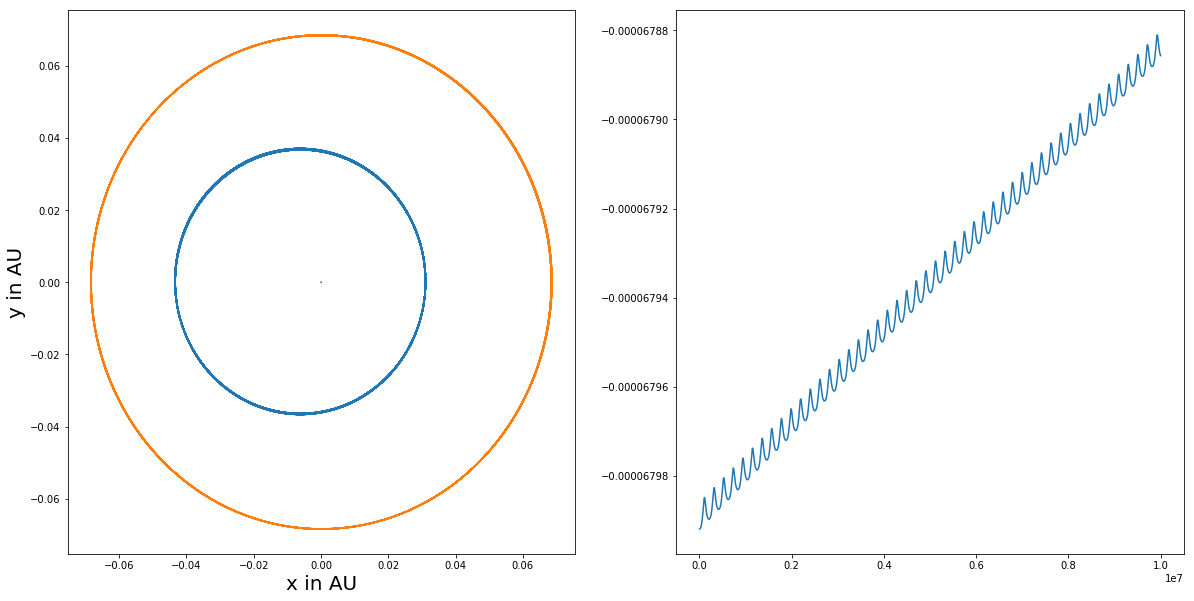

In [7]:
# let's make a quick figure

# first create a figure & axes object to store a 1x2 plot
fig, ax = plt.subplots(1, 2, figsize=(10*2, 10))

# loop over all particles and plot their x/y coordinates at all times
for i in range(r_h.shape[0]): # loop over all particles
    ax[0].plot(r_h[i, 0, :], r_h[i, 1, :])
    # above is 
    # plot(r_h[ith particle, x axis, all timesteps], r_h[ith particle, y axis, all timesteps])
    
# label the first axis
ax[0].set_xlabel('x in AU', fontsize=20) # set label on horizontal axis
ax[0].set_ylabel('y in AU', fontsize=20) # label on vertical axis
#ax[0].set_ticksize(15)

    
# also plot energy as a function of time
ax[1].plot(t_h, E_h)
# plotting time vs energy

plt.show() # show the plot!

# Lets (finally) make an animation

In [8]:
!pip install JSAnimation

In [9]:
from JSAnimation.IPython_display import display_animation # actually plot a movie in notebook
from matplotlib import animation

In [10]:
# use a stepsize for subsampling data to save on computation
stepSize = 500

In [11]:
# actually subsample our dataset
# r[number of particles, number of coordinates, number of times]
r = r_h[:,:,0:-1:stepSize]

# t and E *no* coordinates, just timesteps
t = t_h[0:-1:stepSize]
E = E_h[0:-1:stepSize]
t.shape, E_h.shape

((10,), (5000,))

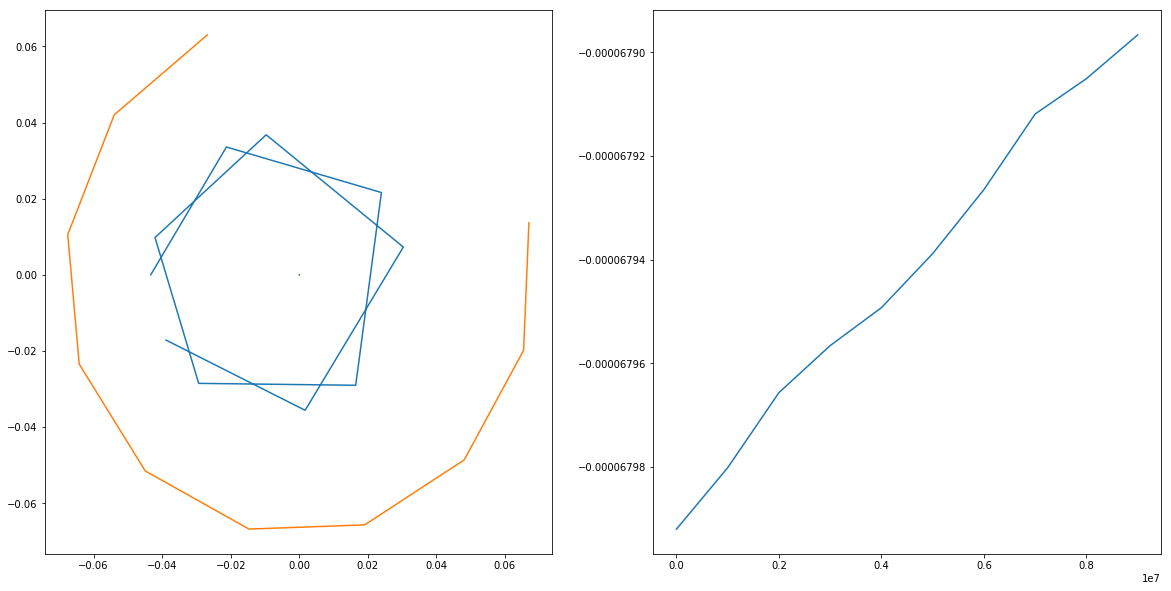

In [12]:
# we'll plot this subsampled dataset again
fig, ax = plt.subplots(1,2,figsize=(10*2,10))
# generating figure and axes for a 1x2 plot

for i in range(r.shape[0]): # loop over number of particles in subsampled position
    ax[0].plot(r[i,0,:],r[i,1,:])
    # plotting for each particle x vs y for all timesteps in subsampled position
    
# plotting subsampled energy on 2nd plot
ax[1].plot(t,E)
plt.show()

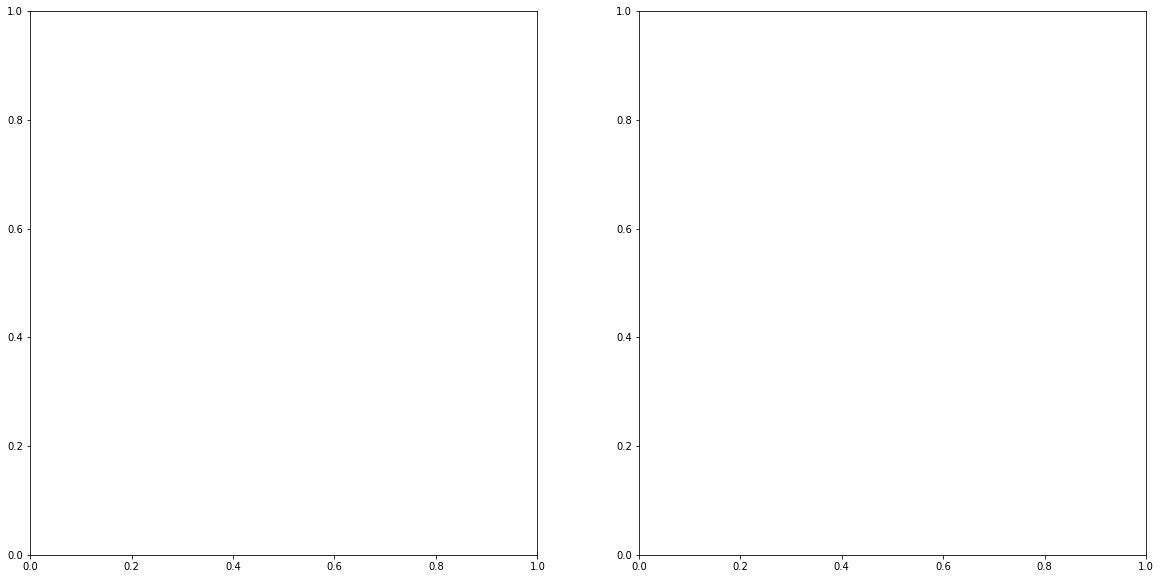

In [13]:
# first, make a figure on which to plot stuff
fig, ax = plt.subplots(1,2, figsize=(10*2,10))
# 1x2 figure

In [14]:
# import an animation function to take our positions, t, E and make animation objects
from animations_library import plot_animations

In [15]:
# use this function to generate a few objects needed for the matplotlib animation function
init, animate, nFrames = plot_animations(fig, ax, t, E, r) 

In [16]:
#r


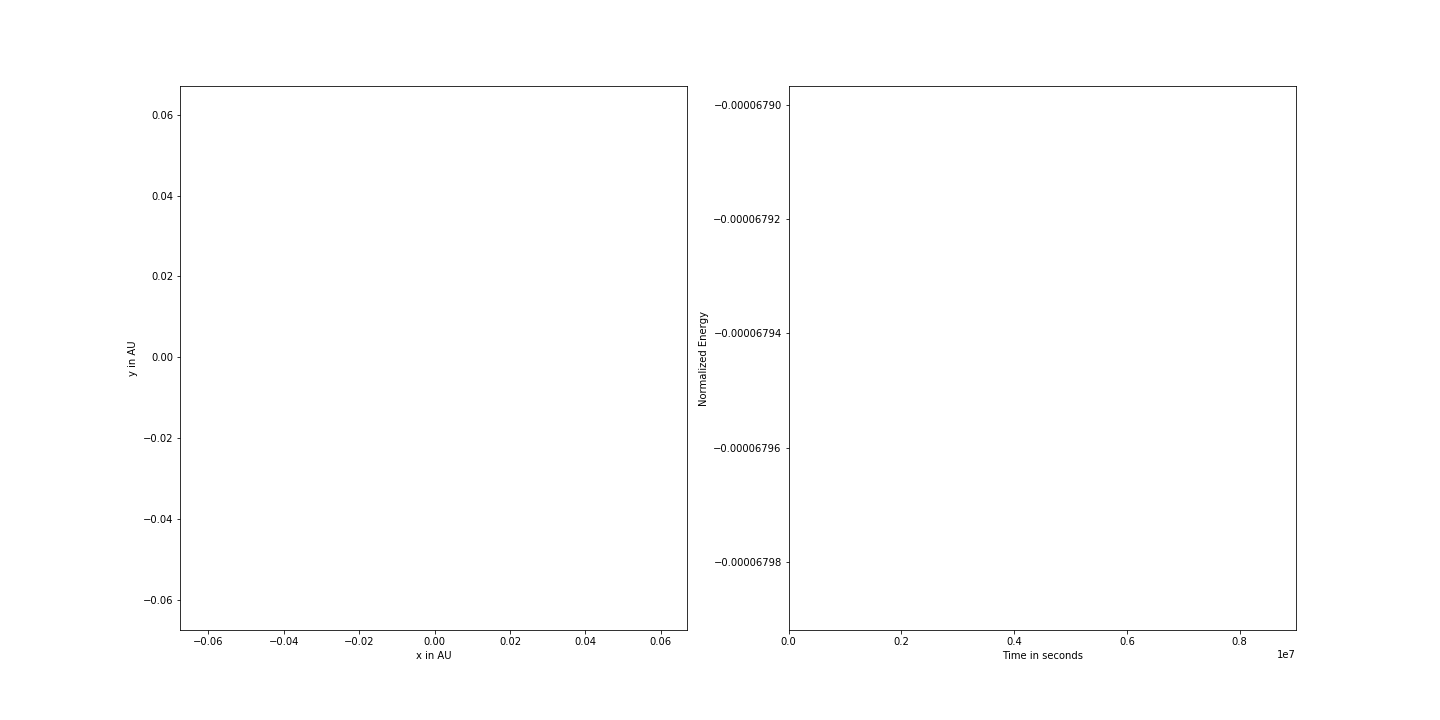
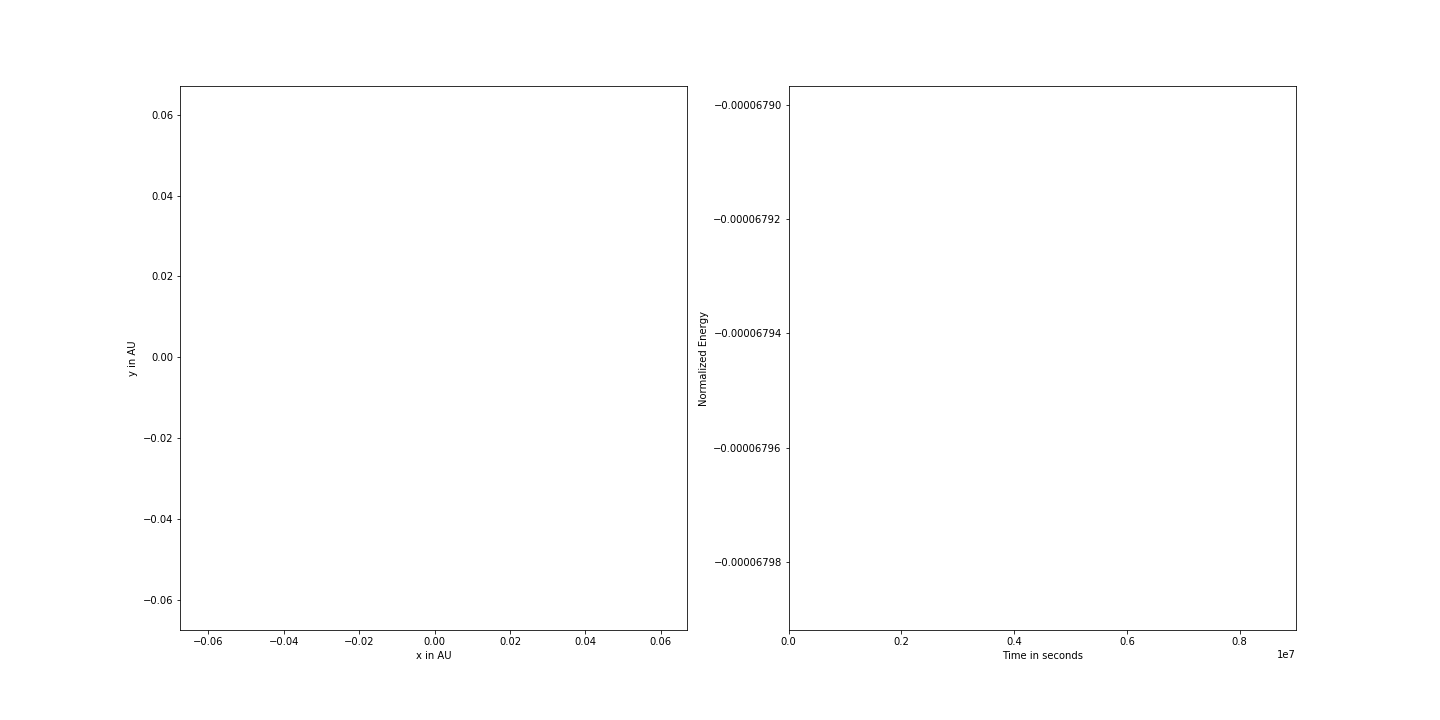
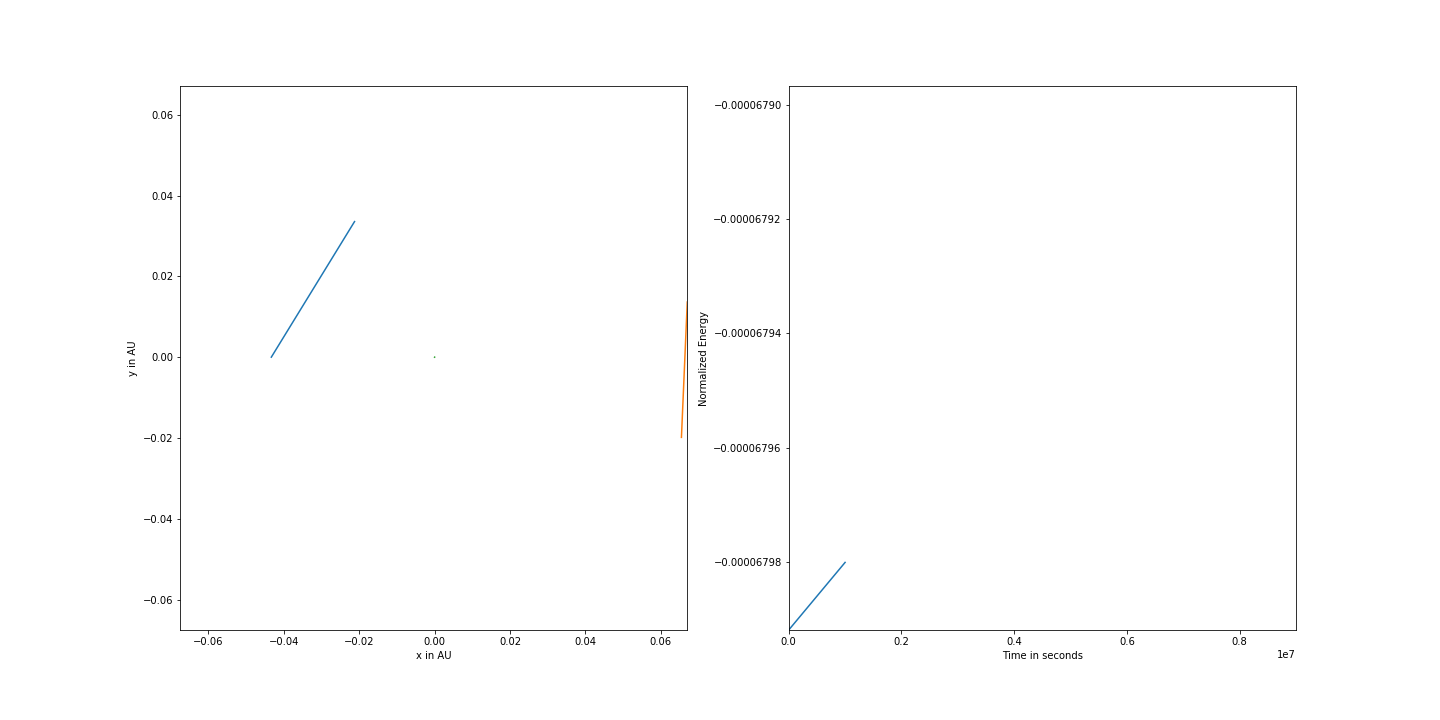
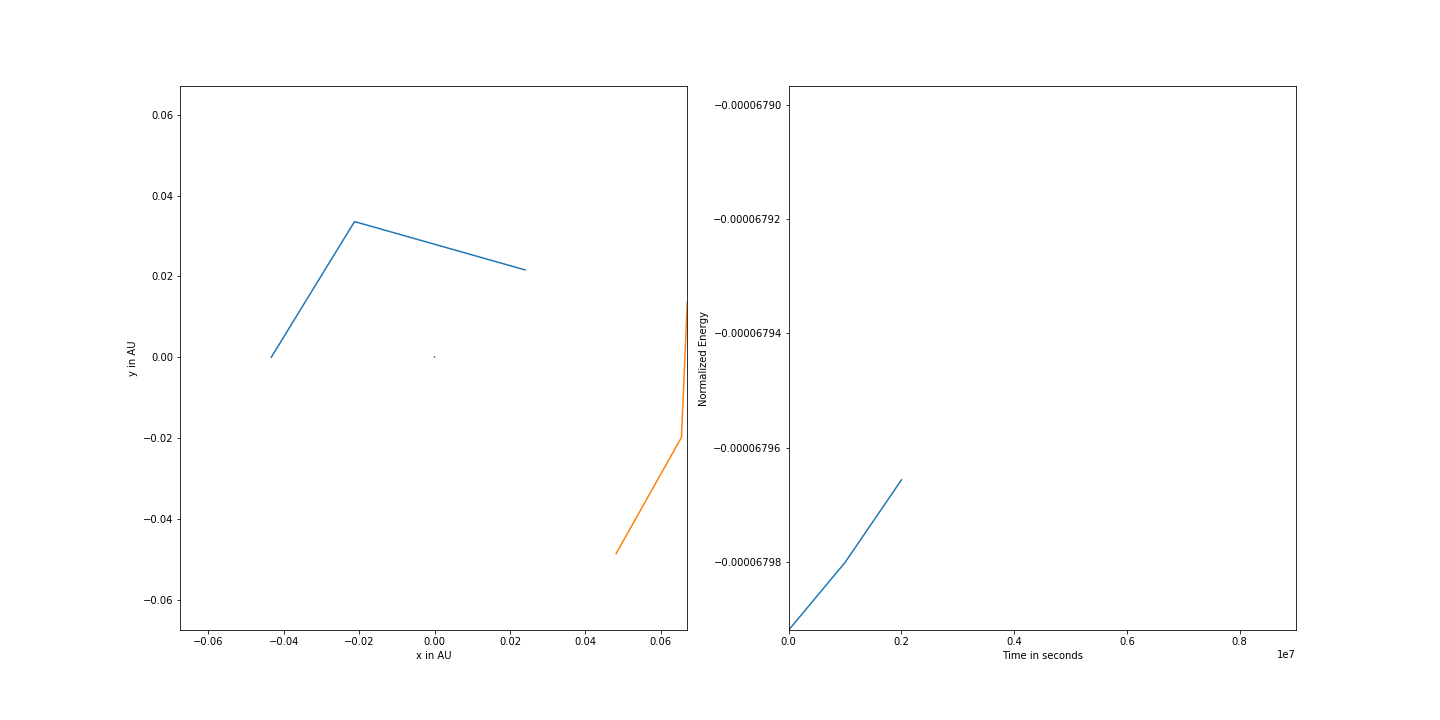
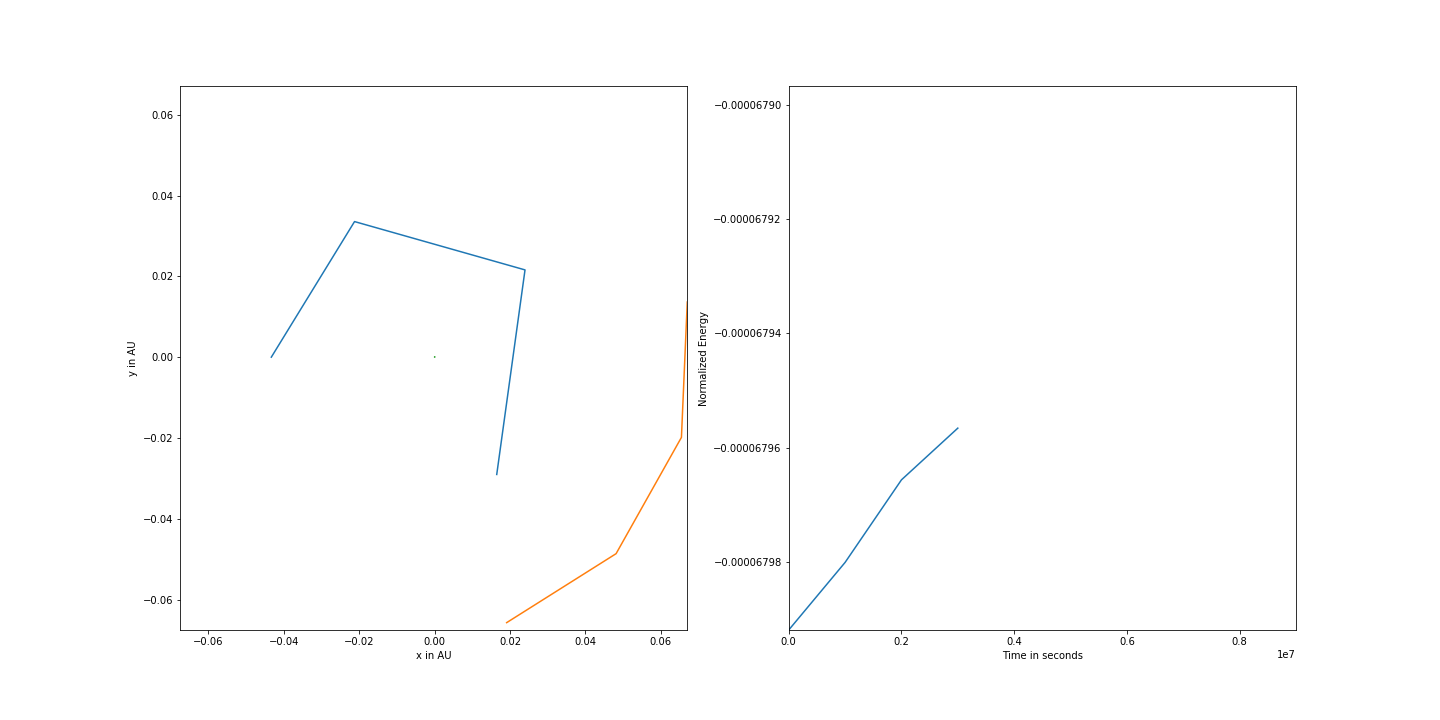
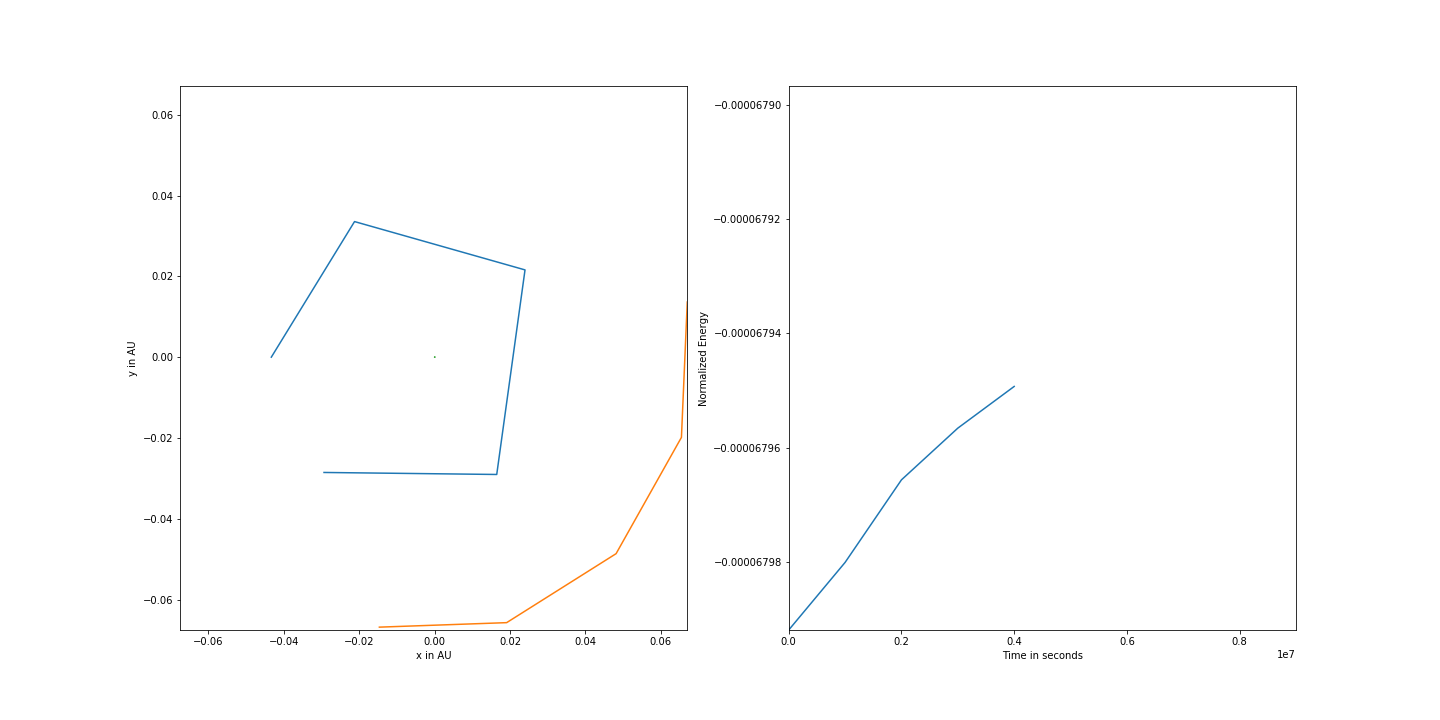
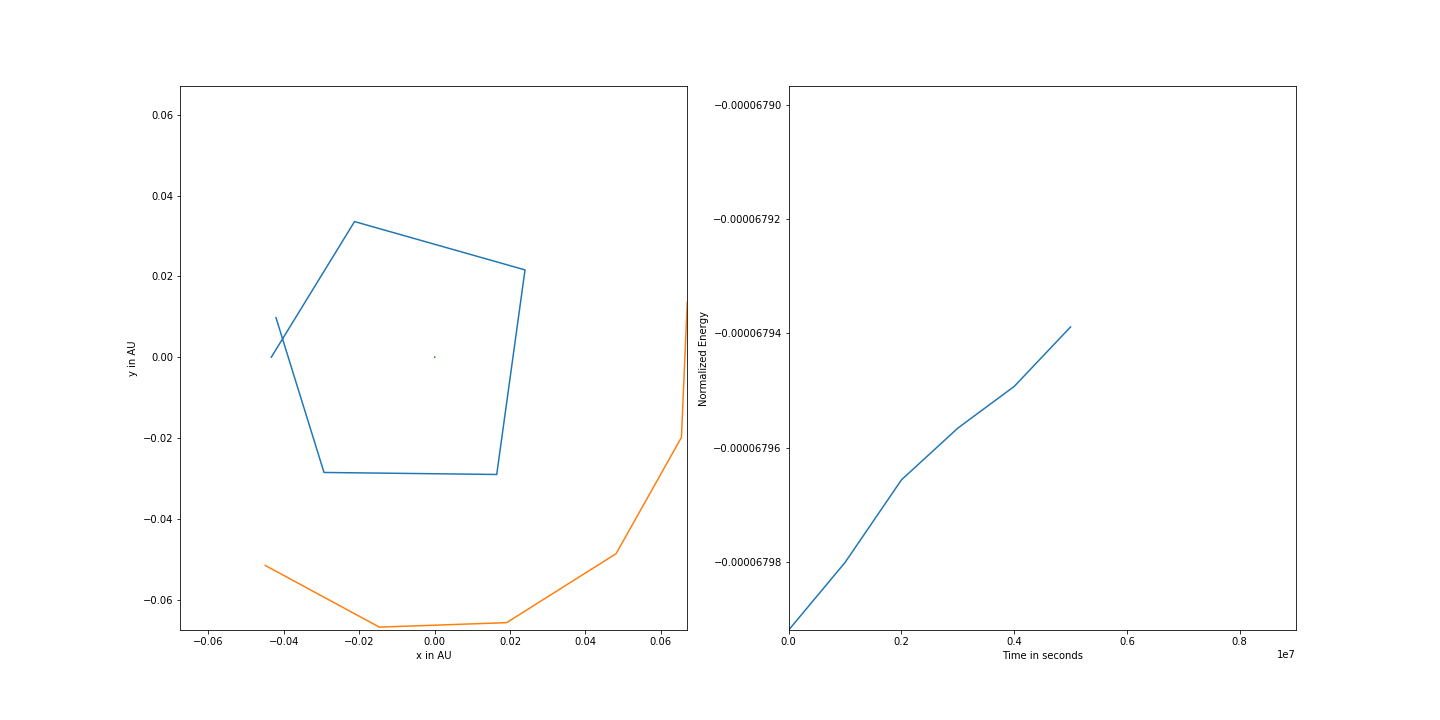
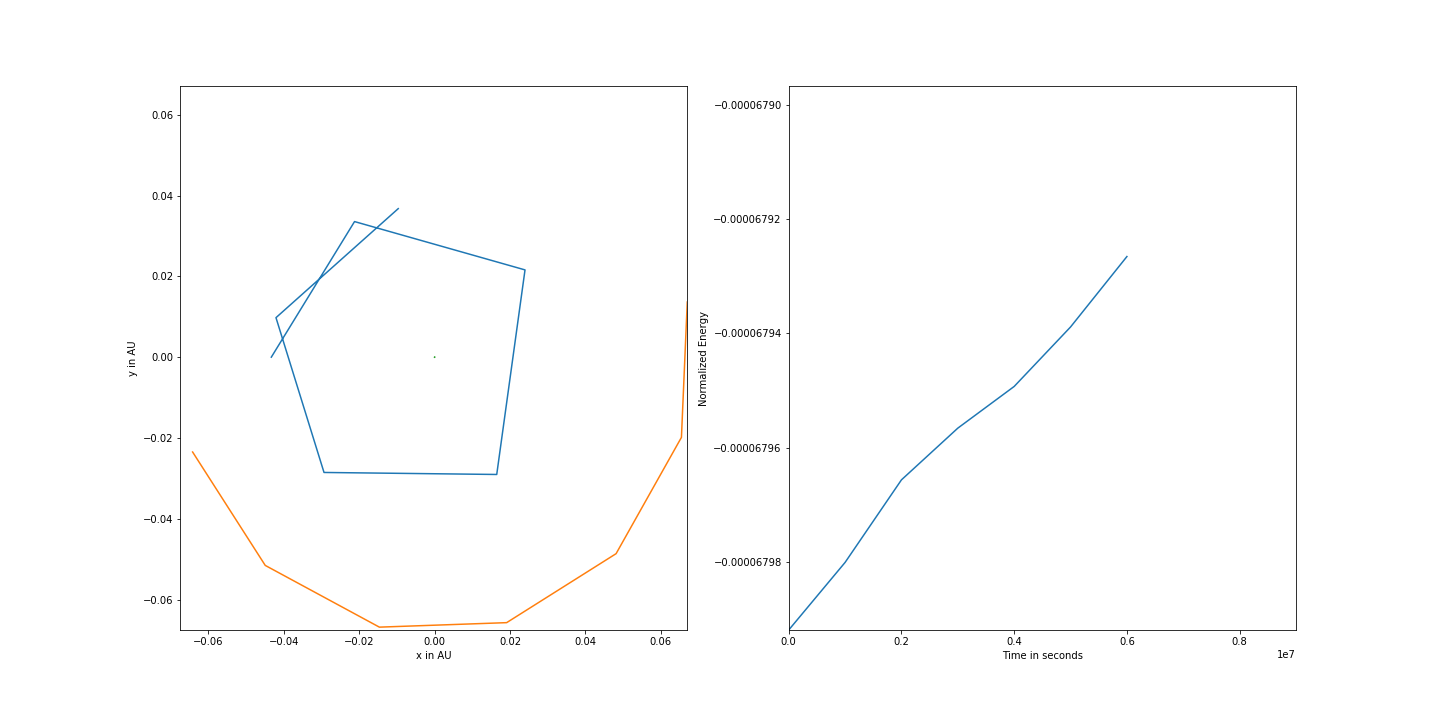
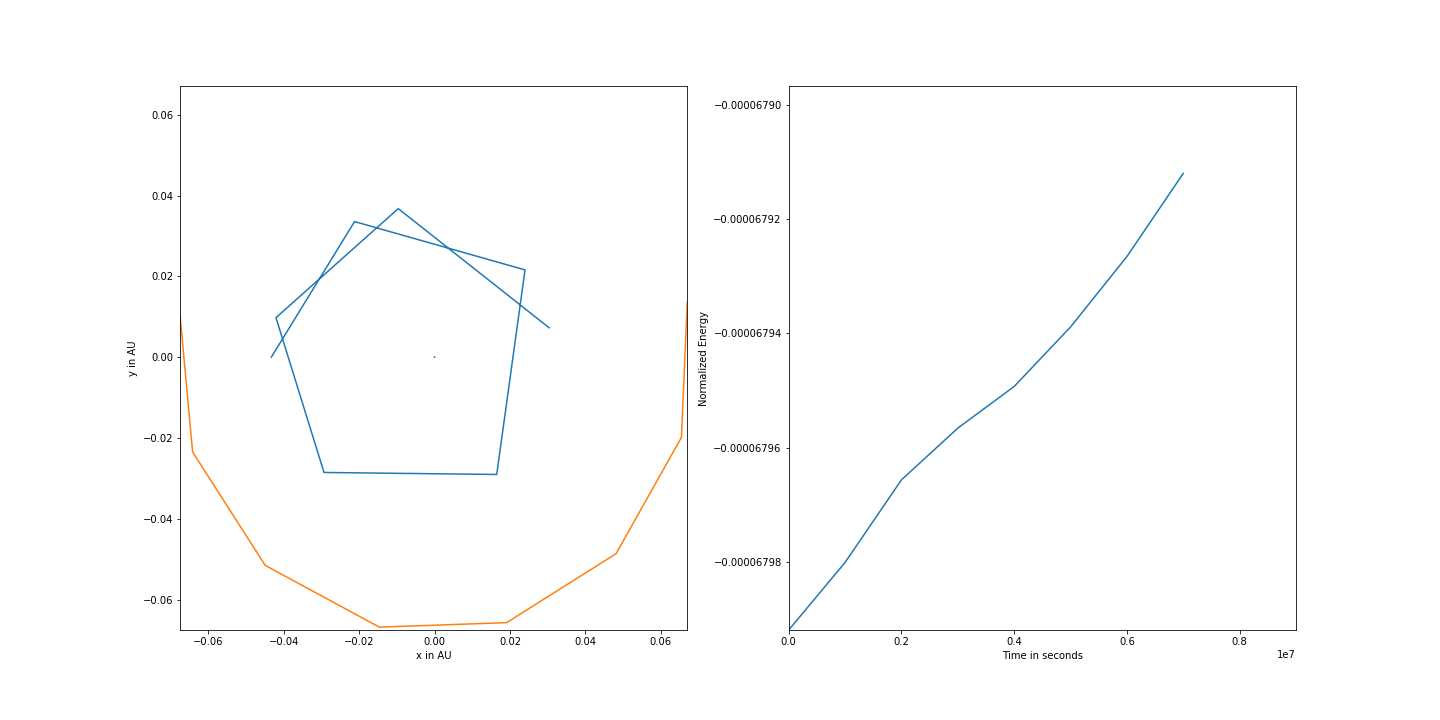
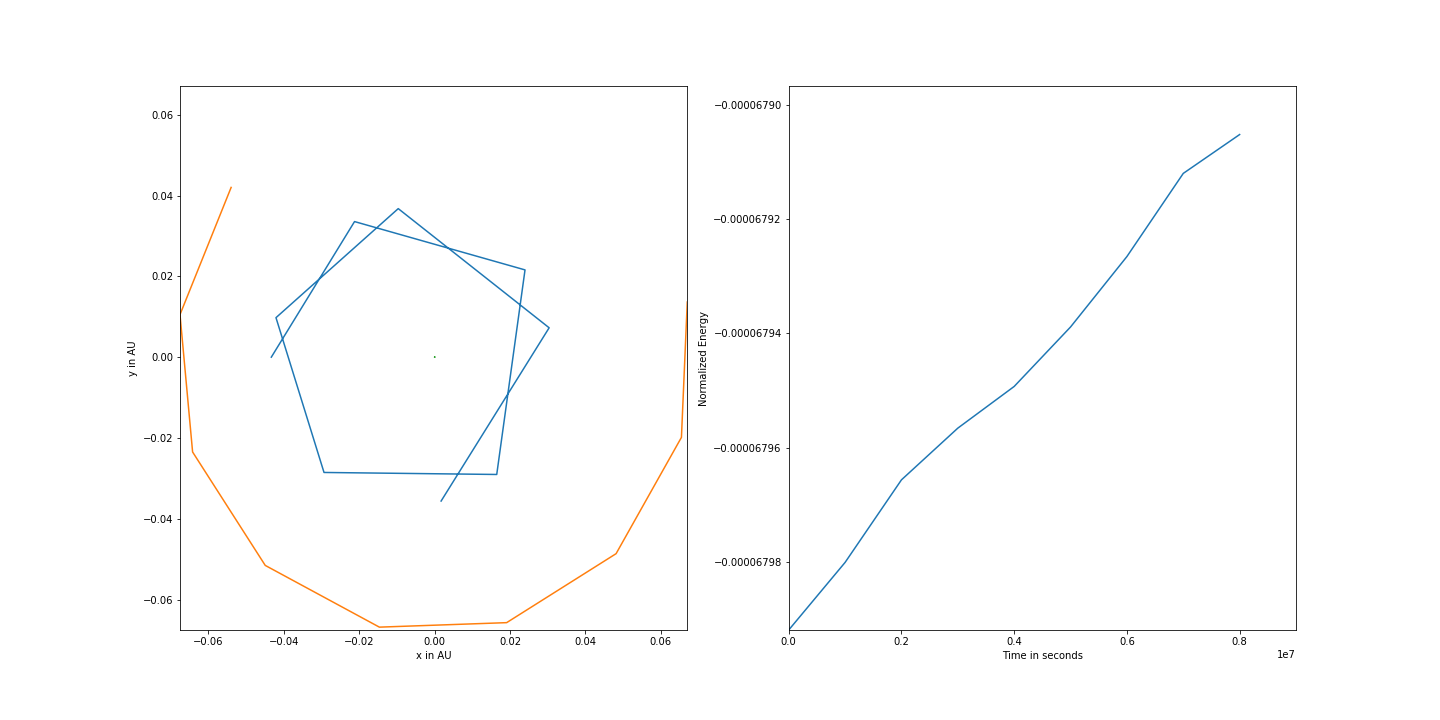

In [17]:
# use the above to make an animation & display it
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                              frames = nFrames, interval=20, blit=True)
# plot on the figure object, with a function that animates
# with our initialization function, over nFrames numbers of frames
#  use an interval between frames of 20 millisec, and don't redraw everything

# finally, display this animation
#display_animation(anim)
anim

## saving animations

In [18]:
anim.save('myAnimation.gif', writer='imagemagick')

In [ ]:
# for mp4 formatting
# if error along the lines of "no ffmpeg"
#!conda install -c conda-forge ffmpeg --yes

Writer = animation.writers['ffmpeg'] # save with an movie writing software called ffmpeg
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800) # formating for ffmpeg

Solving environment: \ 

In [ ]:
anim.save('anim.mp4', writer=writer)

## Exercises
Redo this generation of animations with your dataset.

Other stuff: try modifying things in the `animations_library.py`
* change the colors of things being plotted (hint: google colors for plots in python)
* use different plotting symbols (hint: google marker styles for python)
* plot y/z or x/z 
* adding in more plots than just 1 coordinate plot (1x4)
* check out what is available for a 3D projection plot (hint: google projection 3d, 3d plots, in python)

# Interactive/Data/Info Viz

In [ ]:
import pandas as pd

In [ ]:
planets = pd.read_csv('planets_2019.07.12_17.16.25.csv', sep=',', comment='#')

In [ ]:
planets

In [ ]:
planets.loc[0:3] # first 4 entries of dataset

In [ ]:
# columns of dataset
planets.columns

In [ ]:
# how many unique stars are here (multiplanet systems)
planets['pl_hostname'].unique()

In [ ]:
planets['pl_hostname'].nunique()

In [ ]:
# print out stats about my data easily
planets.describe()

In [ ]:
# make a quick plot
planets['pl_orbeccen'].plot()

In [ ]:
# make a histogram using pandas
myPlot = planets['pl_orbeccen'].hist()
myPlot.set_xlabel('Eccentricity') # setting my label on my x-axis
myPlot.set_ylabel('Number of planets with given Eccentricy') # y-axis

In [ ]:
# doing the same plot another way with our maplotlib framework
fig, ax = plt.subplots(1,1, figsize=(5,5))

planets['pl_orbeccen'].hist(ax=ax)

ax.set_xlabel('Eccentricity')
ax.set_ylabel('Number of planets with given eccentricity')
plt.show()

In [ ]:
# trying a different plotting style
with plt.style.context('ggplot'): # making sure just the plot under here is with 'ggplot' style
    fig, ax = plt.subplots(1,1, figsize=(5,5)) # fig, ax object
    planets['pl_orbeccen'].hist(ax=ax) # histogram on these axes
    ax.set_xlabel('Ecc') # horizontal axes def
    ax.set_ylabel('# of planets at ecc') # vertical axes def
    plt.show()

In [ ]:
plt.style.available

In [ ]:
# we'll use the widgets library to do this interactively
import ipywidgets

In [ ]:
# use something funny called a decorator function, this "decorates" whatever comes right
#  after it
@ipywidgets.interact(style=plt.style.available) # this will make the style interactive
def make_plot(style): # function to make a plot with a given style
    with plt.style.context(style): # do plot with variable styles
        fig, ax = plt.subplots(1,1,figsize=(5,5)) # same fig, ax as before
        planets['pl_orbeccen'].hist(ax=ax) # histogram on axes
        # label x & y
        ax.set_xlabel('ecc')
        ax.set_ylabel('# of planets with ecc')
        plt.show()

In [75]:
# let's also change the number of bins *and* the plot style
@ipywidgets.interact(style=plt.style.available, number_of_bins=range(1,20,1))
def make_plot(style, number_of_bins):
    with plt.style.context(style):
        fig, ax = plt.subplots(1,1,figsize=(5,5)) # makeing fig, ax
        planets['pl_orbeccen'].hist(ax=ax, bins=number_of_bins)
        # set x&y labels
        ax.set_xlabel('ecc')
        ax.set_ylabel('# of planets at ecc')
        plt.show()

interactive(children=(Dropdown(description='style', options=('seaborn-dark', 'seaborn-darkgrid', 'seaborn-tick…

### Exercise
Pick another variable beside eccentricity and redo this.

Other things to try:
* plot other variables - like an x/y plot
   * try: x = planets['pl_orbeccen']; y = ['pl_orbper']
   * then: ax.plot(x,y)
* make colors a variable
* plot multiple lines

In [80]:
planets['gaia_dist'].shape

(4016,)

In [100]:
!conda list

# packages in environment at /Users/jillnaiman1/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
alabaster                 0.7.12                   py37_0  
anaconda                  2019.03                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.2                    py37_0  
appnope                   0.1.0                    py37_0  
appscript                 1.1.0            py37h1de35cc_0  
asn1crypto                0.24.0                   py37_0  
astroid                   2.2.5                    py37_0  
astropy                   3.1.2            py37h1de35cc_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.1.0                   py37_1  
babel                     2.6.0                    py37_0  
backcall                  0.1.0 

In [101]:
animation.FuncAnimation?

In [ ]:
ax[1].set_xlim(r.min(), r.max())

ax[1].set_xlim(r[:,1,:].min(), r[:,1,:].max()) # for y on the horizontal axes